# Test Win-Stay Lose-Switch 
Notebook to test the Win-stay lose-switch models as opposed to the feature RL

In [15]:
import numpy as np
import sys
sys.path.append("../../")
from src.models.env import WordsconsinEnv
from src.models.feature_rl import *
from src.models.decisionmaker import *
from src.models.utils import *
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg
from scipy.optimize import minimize

In [16]:
# let's test the WSLS epsilon greey behavior with 1 subject

strat_df = pd.read_csv(
    "../../data/processed/exp1/DecayFeatureRL_strat_data_rpe.csv"
)
strat_df = strat_df[strat_df["condition"] == 1].reset_index(drop=True)
sub_strat_df = strat_df[strat_df["subid"] == strat_df["subid"].unique()[0]].reset_index(
    drop=True
)

In [17]:
def _MLE_fit(params, data, model):
    curr_model = model(4, *params, data)
    return curr_model.fit()


bounds = [(0, 1)]
params = [0.5]

In [18]:
# go through and fit all subjects

In [20]:
all_fit_df = pd.DataFrame()
for model in [
    "FeatureRL_no_resp_st",
    "DecayFeatureRL_no_resp_st",
    "WinStayLoseShiftEpsilonGreedy",
    "WinStayLoseShiftEpsilonGreedyWithoutReplacement",
]:
    fit_df = pd.read_csv(
        f"../../data/processed/exp1/{model}_results.csv"
    )
    aic = fit_df["aic"].values
    all_fit_df = pd.concat(
        [
            all_fit_df,
            pd.DataFrame({"subid": fit_df["subid"].values, "model": model, "aic": aic}),
        ]
    )

/var/folders/ww/zfrl45zs3t9gg68ffdbk5_m80000gn/T/ipykernel_9155/1705551915.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(


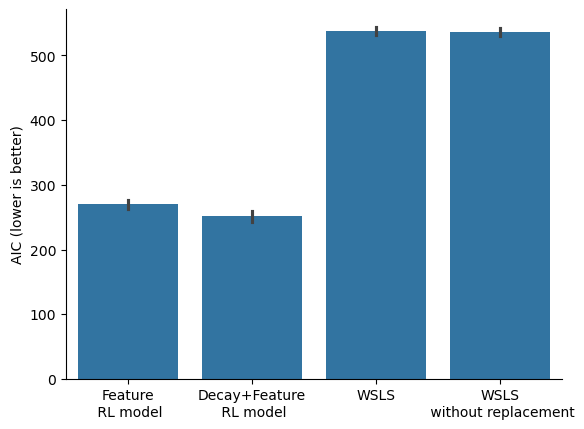

In [21]:
g = sns.barplot(data=all_fit_df, x="model", y="aic")
g.set_xticklabels(
    [
        "Feature\n RL model",
        "Decay+Feature\n RL model",
        "WSLS",
        "WSLS\n without replacement",
    ],
    # rotation=25,
)
g.set_ylabel("AIC (lower is better)")
g.set_xlabel("")
# g.set_title("Model fits on paper data")
sns.despine()

In [22]:
# pivot out each model loglik into it's own column
all_fit_df = all_fit_df.pivot(index="subid", columns="model", values="aic")

In [23]:
all_fit_df = all_fit_df.reset_index()
all_fit_df.head()

model,subid,DecayFeatureRL_no_resp_st,FeatureRL_no_resp_st,WinStayLoseShiftEpsilonGreedy,WinStayLoseShiftEpsilonGreedyWithoutReplacement
0,53987712fdf99b68e3a45021,206.495778,236.293315,561.386199,571.154682
1,55885869fdf99b4020ba0b64,305.357972,308.814288,545.411234,522.325908
2,55914b15fdf99b1e5e44e714,249.581722,290.604327,542.565452,551.112781
3,55bc1119fdf99b5693f3ec47,286.601622,302.264844,528.162868,550.450105
4,5685850c333cbd000d4e042f,231.799418,250.701664,557.093936,551.005395


In [24]:
all_fit_df["diff_decayless"] = (
    all_fit_df["DecayFeatureRL_no_resp_st"] - all_fit_df["FeatureRL_no_resp_st"]
)
all_fit_df[all_fit_df["diff_decayless"] > 0]

model,subid,DecayFeatureRL_no_resp_st,FeatureRL_no_resp_st,WinStayLoseShiftEpsilonGreedy,WinStayLoseShiftEpsilonGreedyWithoutReplacement,diff_decayless
